# 先做出定時螢幕截圖

In [ ]:
## 定時螢幕截圖區塊程式碼，後續可能要改成不秀出畫面，不然都被這步卡住，不會自己2秒截一次圖

import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

## 創造一個放螢幕截圖的資料夾
try:
    os.mkdir('screen_shot')
except:
    print("The folder existed!")

while True:
    ## 螢幕截圖
    img = pyautogui.screenshot()
    ## 轉換成opencv讀得懂的ndarray格式
    open_cv_image = np.array(img) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    # show出節到的圖片
    cv.imshow('screen_shot',open_cv_image)
    k = cv.waitKey(0)     # Wait for a keystroke in the window (e.g.,"a")
    cv.destroyAllWindows()
    
    ## 按q可以離開這個瘋狂截圖的迴圈
    if k == ord('q'): # Stop displaying
        break
        
    # Output to an image file... 
    if k == ord('a'): # 按a可以儲存截圖在screen_shot資料夾，如果不儲存也不離開按q與a之外的任意鍵
        ## 抓取現在時間當檔名
        timestr = time.strftime("%Y%m%d-%H%M%S")
        img_file = "screen_shot/" + timestr +".png"
        cv.imwrite(img_file, open_cv_image)  # 儲存螢幕截圖
        print('Done with output: ' + img_file)
    sleep(2) # 幾秒後截圖一次



The folder existed!


In [ ]:
## 定時螢幕截圖區塊程式碼，這部分是直接60秒截一次圖並儲存，但要停止只能按上面的停止鈕(KeyboardInterrupt)

import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

## 創造一個放螢幕截圖的資料夾
try:
    os.mkdir('screen_shot')
except:
    print("The folder existed!")

while True:
    ## 螢幕截圖
    img = pyautogui.screenshot()
    ## 轉換成opencv讀得懂的ndarray格式
    open_cv_image = np.array(img) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    img_file = "screen_shot/" + timestr +".png"
    cv.imwrite(img_file, open_cv_image)  # 儲存螢幕截圖
    print('Done with output: ' + img_file)
    sleep(60) # 幾秒後截圖一次


In [1]:
## 定時螢幕截圖區塊程式碼，後續可能要改成不秀出畫面，不然都被這步卡住，不會自己2秒截一次圖，加上藍色mask濾出自來

import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

## 創造一個放螢幕截圖的資料夾
# try:
#     os.mkdir('screen_shot')
# except:
#     print("The folder existed!")

while True:
    ## 螢幕截圖
    img = pyautogui.screenshot()
    ## 轉換成opencv讀得懂的ndarray格式
    open_cv_image = np.array(img) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy()

    hsv = cv.cvtColor(open_cv_image, cv.COLOR_BGR2HSV)
    # Define range of blue color in HSV
    #   H : in range of [0,179].
    #   S : in range of [0,255].
    #   V : in range of [0,255].
    # [Ref]: Wikipedia - HSV 色輪圖
    lower_blue = np.array([96,50,50])    # [80,50,50]
    upper_blue = np.array([99,255,255])  # [250,255,255]
    
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(open_cv_image,open_cv_image, mask= mask)
#     cv.imshow('open_cv_image',open_cv_image)
#     cv.imshow('mask',mask)
    cv.imshow('res',res)


    # show出節到的圖片
    cv.imshow('screen_shot',open_cv_image)
    k = cv.waitKey(0)     # Wait for a keystroke in the window (e.g.,"a")
    cv.destroyAllWindows()
    
    ## 按q可以離開這個瘋狂截圖的迴圈
    if k == ord('q'): # Stop displaying
        break
        
    # Output to an image file... 
    if k == ord('a'): # 按a可以儲存截圖在screen_shot資料夾，如果不儲存也不離開按q與a之外的任意鍵
        ## 抓取現在時間當檔名
        timestr = time.strftime("%Y%m%d-%H%M%S")
        img_file = "screen_shot/" + timestr +".png"
        cv.imwrite(img_file, open_cv_image)  # 儲存螢幕截圖
        print('Done with output: ' + img_file)
    sleep(2) # 幾秒後截圖一次



In [1]:
# trackbar調整螢幕截圖的mask看能不能準確抓到要的顏色
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## 螢幕截圖
img = pyautogui.screenshot()
## 轉換成opencv讀得懂的ndarray格式
open_cv_image = np.array(img) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy()
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar("lower_hue",'image',0,179,nothing)  # 調整lower_H (hue)
cv.createTrackbar("upper_hue",'image',0,179,nothing)  # 調整upper_H (hue)
# cv.createTrackbar('lower_saturation','image',0,255,nothing)  # 調整lower_S (saturation)
# cv.createTrackbar('upper_saturation','image',0,255,nothing)  # 調整upper_S (saturation)
# cv.createTrackbar('lower_value','image',0,255,nothing)  #調整lower_V (value) 
# cv.createTrackbar('upper_value','image',0,255,nothing)  #調整upper_V (value) 

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
res = open_cv_image   # 第一次要先定義出來
mask = open_cv_image   # 第一次要先定義出來

# Convert BGR to HSV
hsv = cv.cvtColor(res, cv.COLOR_BGR2HSV)

while(1):
    cv.imshow('image',res)
#     cv.imshow('mask',mask)
    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    lower_hue = cv.getTrackbarPos("lower_hue",'image')
    upper_hue = cv.getTrackbarPos("upper_hue",'image')
#     lower_saturation = cv.getTrackbarPos("lower_saturation",'image')
#     upper_saturation = cv.getTrackbarPos("upper_saturation",'image')
#     lower_value = cv.getTrackbarPos('lower_value','image')
#     upper_value = cv.getTrackbarPos('upper_value','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        res[:] = open_cv_image
    else:
        
        
        # Define range of blue color in HSV
        #   H : in range of [0,179].
        #   S : in range of [0,255].
        #   V : in range of [0,255].
        # [Ref]: Wikipedia - HSV 色輪圖
#         lower_bound = np.array([lower_hue,lower_saturation,lower_value])    # [80,50,50]
#         upper_bound = np.array([upper_hue,upper_saturation,upper_value])  # [250,255,255]
        res = img
        lower_bound = np.array([lower_hue,50,50])    # [80,50,50]
        upper_bound = np.array([upper_hue,255,255])  # [250,255,255]
        
        # Threshold the HSV image to get selected colors
        mask = cv.inRange(hsv, lower_bound, upper_bound)
        
        # Bitwise-AND mask and original image
        res = cv.bitwise_and(res,res, mask= mask)
#         cv.imshow('res',res)
        cv.imshow('mask',mask)
#         cv.imshow('res',res)
        
cv.destroyAllWindows()

In [17]:
# trackbar調整已截好的螢幕截圖的mask看能不能準確抓到要的顏色
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## 螢幕截圖
img = cv.imread('screen_shot.png')  # 改為之前截好的螢幕截圖
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar("lower_hue",'image',0,179,nothing)  # 調整lower_H (hue)
cv.createTrackbar("upper_hue",'image',0,179,nothing)  # 調整upper_H (hue)
# cv.createTrackbar('lower_saturation','image',0,255,nothing)  # 調整lower_S (saturation)
# cv.createTrackbar('upper_saturation','image',0,255,nothing)  # 調整upper_S (saturation)
# cv.createTrackbar('lower_value','image',0,255,nothing)  #調整lower_V (value) 
# cv.createTrackbar('upper_value','image',0,255,nothing)  #調整upper_V (value) 

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
res = img   # 第一次要先定義出來
mask = img   # 第一次要先定義出來

# Convert BGR to HSV
hsv = cv.cvtColor(res, cv.COLOR_BGR2HSV)

while(1):
    cv.imshow('image',res)
#     cv.imshow('mask',mask)
    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    lower_hue = cv.getTrackbarPos("lower_hue",'image')
    upper_hue = cv.getTrackbarPos("upper_hue",'image')
#     lower_saturation = cv.getTrackbarPos("lower_saturation",'image')
#     upper_saturation = cv.getTrackbarPos("upper_saturation",'image')
#     lower_value = cv.getTrackbarPos('lower_value','image')
#     upper_value = cv.getTrackbarPos('upper_value','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        res[:] = img
    else:
        
        
        # Define range of blue color in HSV
        #   H : in range of [0,179].
        #   S : in range of [0,255].
        #   V : in range of [0,255].
        # [Ref]: Wikipedia - HSV 色輪圖
#         lower_bound = np.array([lower_hue,lower_saturation,lower_value])    # [80,50,50]
#         upper_bound = np.array([upper_hue,upper_saturation,upper_value])  # [250,255,255]
        res = img   # 每次調整都要reset
        lower_bound = np.array([lower_hue,50,50])    # [80,50,50]
        upper_bound = np.array([upper_hue,255,255])  # [250,255,255]
        
        # Threshold the HSV image to get selected colors
        mask = cv.inRange(hsv, lower_bound, upper_bound)
        
        # Bitwise-AND mask and original image
        res = cv.bitwise_and(res,res, mask= mask)
#         cv.imshow('res',res)
#         cv.imshow('mask',mask)
#         cv.imshow('res',res)
        
cv.destroyAllWindows()

In [20]:
# trackbar調整已截好的螢幕截圖做canny edge detection
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## 螢幕截圖
img = cv.imread('screen_shot.png',0 )  # 改為之前截好的螢幕截圖
cv.namedWindow('image')
img_copy = img.copy() # 複製一個出來,避免改到原圖

# create trackbars for canny threshold1, threshold2
cv.createTrackbar("threshold1",'image',0,1000,nothing)  # 調整threshold1
cv.createTrackbar("threshold2",'image',0,1000,nothing)  # 調整threshold2

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
edges = img_copy   # 第一次要先定義出來


while(1):
    cv.imshow('image',edges) # 每次調整完再show出來
    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    threshold1 = cv.getTrackbarPos("threshold1",'image')
    threshold2 = cv.getTrackbarPos("threshold2",'image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        edges = img_copy
    else:
        
        edges = img_copy   # 每次調整都要reset
        edges = cv.Canny(edges,threshold1,threshold2)
        
        
cv.destroyAllWindows()

In [21]:
# 攝影機抓canny edge detection
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):
    # Take each frame
    _, frame = cap.read()
    
    edges = cv.Canny(frame,100,200)
    
#     # Convert BGR to HSV
#     hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
#     # Define range of blue color in HSV
#     #   H : in range of [0,179].
#     #   S : in range of [0,255].
#     #   V : in range of [0,255].
#     # [Ref]: Wikipedia - HSV 色輪圖
#     lower_blue = np.array([110,50,50])    # [80,50,50]
#     upper_blue = np.array([130,255,255])  # [250,255,255]
    
#     # Threshold the HSV image to get only blue colors
#     mask = cv.inRange(hsv, lower_blue, upper_blue)
    
#     # Bitwise-AND mask and original image
#     res = cv.bitwise_and(frame,frame, mask= mask)
    
    cv.imshow('frame',frame)
    cv.imshow('edges',edges)
#     cv.imshow('res',res)
    
    k = cv.waitKey(5)
    if k == 27:   # Press "Esc" to stop
        break
        
cv.destroyAllWindows()

In [30]:
# trackbar調整live video做canny edge detection
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## live video
cap = cv.VideoCapture(0)
cv.namedWindow('frame')

# create trackbars for canny threshold1, threshold2
cv.createTrackbar("threshold1",'frame',0,1000,nothing)  # 調整threshold1
cv.createTrackbar("threshold2",'frame',0,1000,nothing)  # 調整threshold2

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'frame',0,1,nothing)

while(1):
    # Take each frame
    _, frame = cap.read()
    
    # 轉成灰階邊緣抓得比較清楚
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    cv.imshow('frame',edges) # 每次調整完再show出來
    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    threshold1 = cv.getTrackbarPos("threshold1",'frame')
    threshold2 = cv.getTrackbarPos("threshold2",'frame')
    s = cv.getTrackbarPos(switch,'frame')
    if s == 0:
        edges = frame
    else:
        
        edges = cv.Canny(frame,threshold1,threshold2)
        
        
cv.destroyAllWindows()
cap.release()

In [44]:
# trackbar調整live video做canny edge detection,然後錄影存檔
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

cap = cv.VideoCapture(0)

# create trackbars for canny threshold1, threshold2
cv.namedWindow('frame')
cv.createTrackbar("threshold1",'frame',0,1000,nothing)  # 調整threshold1
cv.createTrackbar("threshold2",'frame',0,1000,nothing)  # 調整threshold2

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'frame',0,1,nothing)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')  # *'XVID' or 'X','V','I','D'
out = cv.VideoWriter('output.avi', fourcc, 
                     20.0,        # frames per second
                     (640,  480)) # frame size & isColor=True (default)，640是X軸，480是Y軸

while cap.isOpened():
    isTrue, frame = cap.read()
    if not isTrue:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    #  flip every frame in the vertical direction    
    frame = cv.flip(frame, 1)
    
    # 轉成灰階邊緣抓得比較清楚
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # write the flipped frame
    out.write(edges)
    cv.imshow('frame', edges)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    threshold1 = cv.getTrackbarPos("threshold1",'frame')
    threshold2 = cv.getTrackbarPos("threshold2",'frame')
    s = cv.getTrackbarPos(switch,'frame')
    if s == 0:
        edges = frame
    else:
        
        edges = cv.Canny(frame,threshold1,threshold2)    
    

    
#     if cv.waitKey(1) == ord('q'):
#         break
        
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [51]:
# trackbar調整live video做canny edge detection,然後錄影存檔(測試1,把switch拿掉)
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

cap = cv.VideoCapture(0)

# # create trackbars for canny threshold1, threshold2
# cv.namedWindow('frame')
# cv.createTrackbar("threshold1",'frame',0,1000,nothing)  # 調整threshold1
# cv.createTrackbar("threshold2",'frame',0,1000,nothing)  # 調整threshold2

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')  # *'XVID' or 'X','V','I','D'
out = cv.VideoWriter('output.avi', fourcc, 
                     20.0,        # frames per second
                     (640,  480)) # frame size & isColor=True (default)，640是X軸，480是Y軸

while cap.isOpened():
    isTrue, frame = cap.read()
    if not isTrue:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    #  flip every frame in the vertical direction    
    frame = cv.flip(frame, 1)
    
    # 轉成灰階邊緣抓得比較清楚
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)


    

#     # get current positions of four trackbars
#     threshold1 = cv.getTrackbarPos("threshold1",'frame')
#     threshold2 = cv.getTrackbarPos("threshold2",'frame')
    frame = cv.Canny(frame,32,91)   
    
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)    

    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break    
    
#     if cv.waitKey(1) == ord('q'):
#         break

# Release everything if job is finished        
cap.release()
out.release()
cv.destroyAllWindows()

In [67]:
# trackbar調整live video做canny edge detection,然後錄影存檔(測試2,直接外加一行轉canny或轉灰階,依舊無法存檔錄影)
cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')  # *'XVID' or 'X','V','I','D'
out = cv.VideoWriter('output.avi', fourcc, 
                     20.0,        # frames per second
                     (640,  480)) # frame size & isColor=True (default)，640是X軸，480是Y軸

while cap.isOpened():
    isTrue, frame = cap.read()
    if not isTrue:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    #  flip every frame in the horizontal direction    
    frame = cv.flip(frame, 1)
    
    # 轉成灰階邊緣抓得比較清楚
#     frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame = cv.Canny(frame,32,91)

    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    
    if cv.waitKey(1) == ord('q'):
        break
        
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

# 從這裡正式來
    1. 抓圖片(螢幕截圖)
    2. 擷取0-9的數字小圖，並放到list中，包含小數點(設計trackbar小工具來抓出這些區域)
    3. 用 `cv.findContours()`來抓出同樣的圖片
    4. 把各個欲抓取的數字圖塊抓出來，並放到另一個list中(設計trackbar小工具來抓出這些區域)
    5. 寫巢狀迴圈，一個一個把第4步抓出的圖塊，與第2步抓出的圖塊比對辨識
    6. 資料存成csv

In [3]:
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## 螢幕截圖
img = cv.imread('screen_shot.png')  # 改為之前截好的螢幕截圖
img.shape

(1080, 1920, 3)

In [41]:
# trackbar調整已截好的螢幕截圖想抓取的區域，目標抓出最適當的辨識圖片與區域
# 使用時注意lower bound不要大於upper bound
import cv2 as cv
import numpy as np

import pyautogui
import sys
import os

from time import sleep
import time

def nothing(x):
    pass

## 螢幕截圖
img = cv.imread('screen_shot.png')  # 改為之前截好的螢幕截圖
cv.namedWindow('image')

# 因為視窗會隨著圖片大小變動，所以把trackbar與調整的圖片視窗分開
trackbar_window = np.zeros((100,1920,1), np.uint8)
cv.namedWindow('trackbar') 
cv.imshow('trackbar',trackbar_window)

# create trackbars for image size
cv.createTrackbar("lower_Height",'trackbar',0,1080,nothing)  # 調整lower_Height，因為截圖大小的Height為1080
cv.createTrackbar("upper_Height",'trackbar',1,1080,nothing)  # 調整upper_Height，因為截圖大小的Height為1080
cv.createTrackbar('lower_Weight','trackbar',0,1920,nothing)  # 調整lower_Weight，因為截圖大小的Height為1920
cv.createTrackbar('upper_Weight','trackbar',1,1920,nothing)  # 調整upper_Weight，因為截圖大小的Height為1920

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'trackbar',0,1,nothing)
res = img   # 第一次要先定義出來


while(1):
    cv.imshow('image',res)

    k = cv.waitKey(1) & 0xFF
    if k == 27:      # Press "Esc" to stop
        break
    # get current positions of four trackbars
    lower_Height = cv.getTrackbarPos("lower_Height",'trackbar')
    upper_Height = cv.getTrackbarPos("upper_Height",'trackbar')
    lower_Weight = cv.getTrackbarPos("lower_Weight",'trackbar')
    upper_Weight = cv.getTrackbarPos("upper_Weight",'trackbar')

    s = cv.getTrackbarPos(switch,'trackbar')
    if s == 0:
        res[:] = img
    else:
        
        res = img[lower_Height:upper_Height, lower_Weight:upper_Weight]

cv.destroyAllWindows()

In [62]:
### 各數字圖片範圍紀錄
zero = img[333:345, 503:517]
one =  img[355:367, 484:494]
two =  img[364:378, 1147:1160]
three =  img[364:378, 1162:1175]
four = img[342:356, 1168:1182]
five = img[377:388, 484:494]
six = img[377:388, 497:509]
seven = img[364:377, 1183:1196]
eight = img[329:345, 181:196] # (這不是8，暫時隨便用一個東西替代，不要辨識到就好)
nine = img[364:377, 1199:1210]
dot = img[364:377, 1176:1182]
minus = img[389:402, 1149:1164]

### 欲辨識區域範圍
CPC_flowA = img[332:348, 437:520]
CPC_flowB = img[352:369, 423:533]
CPC_pressure = img[375:391, 430:527]
USI_flow = img[339:359, 1139:1248]
USI_pressure = img[362:379, 1145:1243]
bias_flow = img[385:407, 1138:1229]

In [65]:
# 把剛剛抓出來的位置，放入roi中，看看印出來是不是真如所想那樣
roi = zero # 截圖大小: (1080, 1920, 3)
cv.imshow("Display window", roi)
k = cv.waitKey(0)     # Wait for a keystroke in the window (e.g.,"a")
cv.destroyAllWindows()

In [5]:
# 把數字，小數點，正負號全部截取出來放在number_template中
number_template = [zero, one, two, three, four, five, six, seven, eight, nine, dot, minus]
# 把要辨識的區塊全部截取出來放在number_Tag中
number_Tag = [CPC_flowA, CPC_flowB, CPC_pressure, USI_flow, USI_pressure, bias_flow]


In [71]:
# 用cv.findContours()來比對圖片
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
tag = CPC_flowB # 先用中油流量B做做看
img_rgb = tag.copy()
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.cvtColor(zero, cv.COLOR_BGR2GRAY) # 比對1看看

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED) # 用cv.TM_CCOEFF_NORMED這個演算法做
threshold = 0.78
loc = np.where( res >= threshold)

In [72]:
print(loc[1])

[81 95]


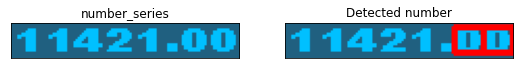

In [73]:
## show出來看看有沒有抓到
for pt in zip(*loc[::-1]): # *是指後面是一串序列資料
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# cv.imwrite('res.png',img_rgb) # 把圖片匯出

plt.figure(figsize=[9, 5])
plt.subplot(121)
plt.imshow(cv.cvtColor(tag, cv.COLOR_BGR2RGB))
plt.title('number_series'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))
plt.title('Detected number'), plt.xticks([]), plt.yticks([])
plt.show()